In [2]:
import numpy as np
import math
from statistics import mean
import matplotlib.pyplot as plt
import random

To define a linear regression we need the fallowing formulations:

$$
m= \frac{\bar{x}\bar{y} - \bar{xy}}{(\bar{x})^2 - \bar{x^2}}, \qquad
b = \bar{y} - m\bar{x}.
$$
Then we have 

$$ y = mx + b. $$

In [3]:
def best_fit_slope(X,Y):
    m= ( ((mean(X) * mean(Y)) - mean(X*Y)) / 
            (mean(X)**2 - mean(X**2)) ) 
    return m

In [4]:
def best_intercept(X,Y,m):
    b = mean(Y) - m*mean(X)
    return b

To calculate the accuracy we can use the determination coeficient ($R^2$). The $R^2$ can calculated with the equation below.
$$R^2 = 1 - \sum_{i=1}^n\frac{(Y_i)^2-(\hat{Y}_i)^2}{(Y_i-\bar{Y})^2}.$$

Where $Y$ are the real results, $\hat{Y}$ are the predicted results and $\bar{Y}$ is the mean value of the results.

In [5]:
def coef_r(Y, Y_pred):
    r = 1 - (sum(Y**2) - sum(Y_pred**2)) / sum((Y - mean(Y))**2)
    return r

In [6]:
# n - number of points
# variance - dispersion of the data
# usestep - data is approximately spaced
# step - step between points
# steptype - type of step (positive or negative)
# returns the sets X and Y

def create_dataset(n, variance, usestep=False, step=2, steptype='positive'):
    X = [i for i in range(n)]
    
    val = 1 #starting value
    Y = []
    for i in range(n):
        y = val + random.randrange(-variance,variance)
        Y.append(y)
        
        if usestep and steptype=='positive':
            val += step
        elif usestep and steptype=='negative':
            val -= step
       
    return (np.array(X, dtype=np.float64), np.array(Y, dtype=np.float64))

In [31]:
def lin_regression(X,Y):
    #finding parameters
    m = best_fit_slope(X,Y)
    b = best_intercept(X,Y,m)

    #defining regression line
    regression_line = [(m*x)+b for x in X]

    Y_pred = np.array([m*x+b for x in X])
    accuracy = coef_r(Y, Y_pred)
    print('accuracy: %f' % (accuracy))

    plt.style.use('seaborn')
    plt.scatter(X,Y, color='red')
    plt.plot(X, regression_line)
    plt.show()
    
    return (round(m,2), round(b,2), round(accuracy,4))

accuracy: 0.584416


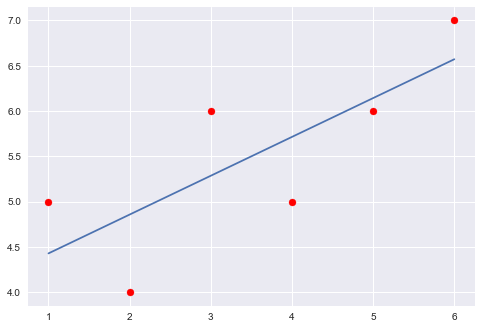

(0.43, 4.0, 0.5844)

In [32]:
# very simple test data
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

lin_regression(xs,ys)

accuracy: 0.504475


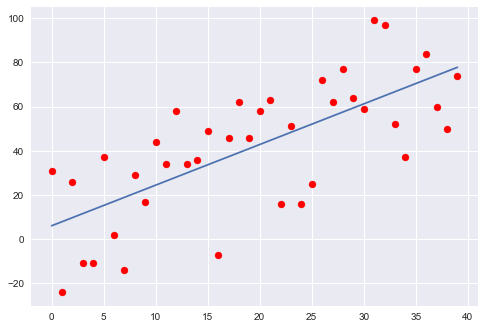

(1.8389305816135095, 6.065853658536561, 0.5044751211225362)

In [25]:
X, Y = create_dataset(40, 40, usestep=True, step=2, steptype='positive')
lin_regression(X,Y)

accuracy: 0.943009


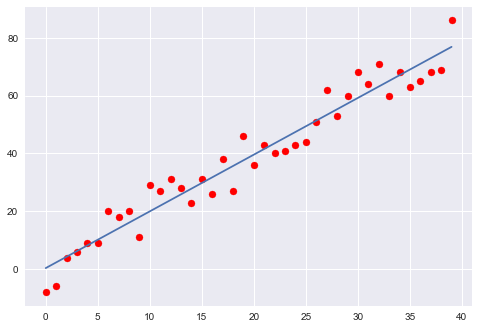

(1.9619136960600372, 0.34268292682927637, 0.9430092261164844)

In [26]:
X, Y = create_dataset(40, 10, usestep=True, step=2, steptype='positive')
lin_regression(X,Y)